In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import re

plt.rcParams['figure.figsize'] = (12,8)

## Transforming (using burtin.json)

In [6]:
data = pd.read_json("data/burtin.json")

In [236]:
data.head()

bacteria      gram  neomycin  penicillin  streptomycin
0  Mycobacterium tuberculosis  negative      2.00       800.0           5.0
1   Salmonella schottmuelleri  negative      0.09        10.0           0.8
2            Proteus vulgaris  negative      0.10         3.0           0.1
3       Klebsiella pneumoniae  negative      1.00       850.0           1.2
4            Brucella abortus  negative      0.02         1.0           2.0

In [237]:
data.describe()

neomycin  penicillin  streptomycin
count  16.000000   16.000000     16.000000
mean    4.089187  217.878063      3.065000
std    10.133165  373.495060      4.502691
min     0.001000    0.001000      0.010000
25%     0.017000    0.006500      0.325000
50%     0.100000    1.000000      1.000000
75%     1.700000  275.000000      2.750000
max    40.000000  870.000000     14.000000

### Use the Burtin data set to make bar plots, group by bacterium, without and with a log transform applied to antibiotic-dosage

In [124]:
def parse_builtin(func_str):
    if "built-in" in func_str:
        output = re.sub('[^\w\s]','',func_str
                       ).split(' ')[-1]
    else:
        output = func_str
    return output

In [131]:
def antibiotic_barplot(antibiotic, transform=None):
    make_title = lambda anti, trans: "{} dosage with{} transform".format(anti[0].upper() + anti[1:], 
                                     "out" if trans is None else " " + parse_builtin(str(transform)))
    
    df = data.assign(col=data[antibiotic]) if transform is None else data.assign(col=data[antibiotic].apply(transform)) 
    g = sns.barplot("bacteria", "col", hue="gram",
                    data=df)
    _ = plt.xticks(rotation=-60, horizontalalignment="left")
    _ = plt.title(make_title(antibiotic, transform))

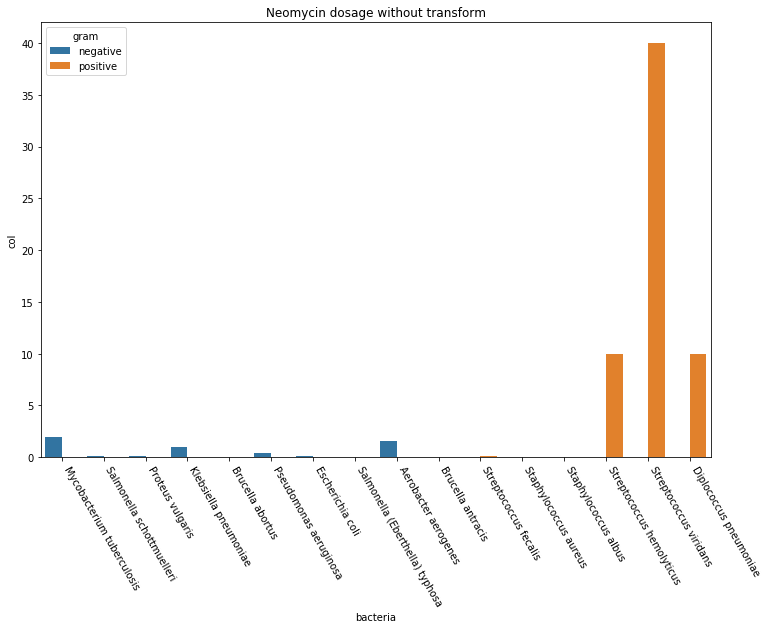

In [129]:
antibiotic_barplot('neomycin')

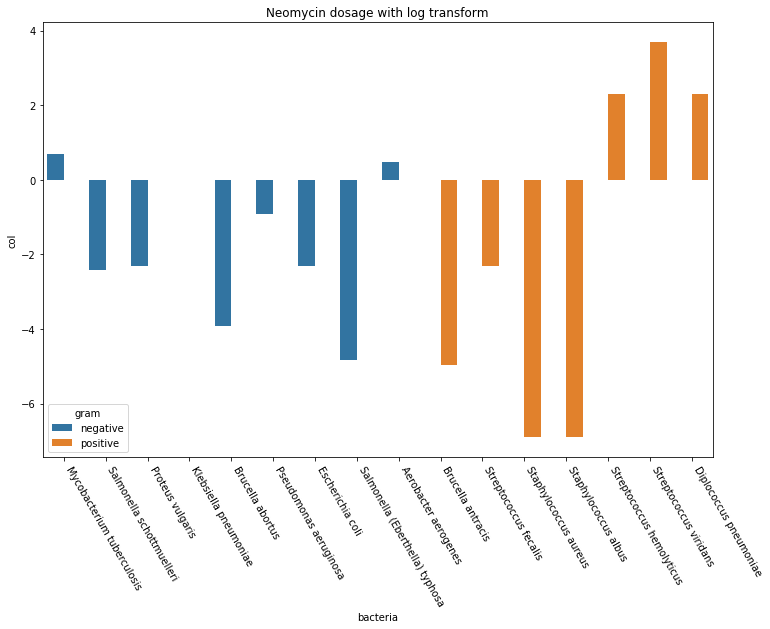

In [132]:
antibiotic_barplot('neomycin', math.log)

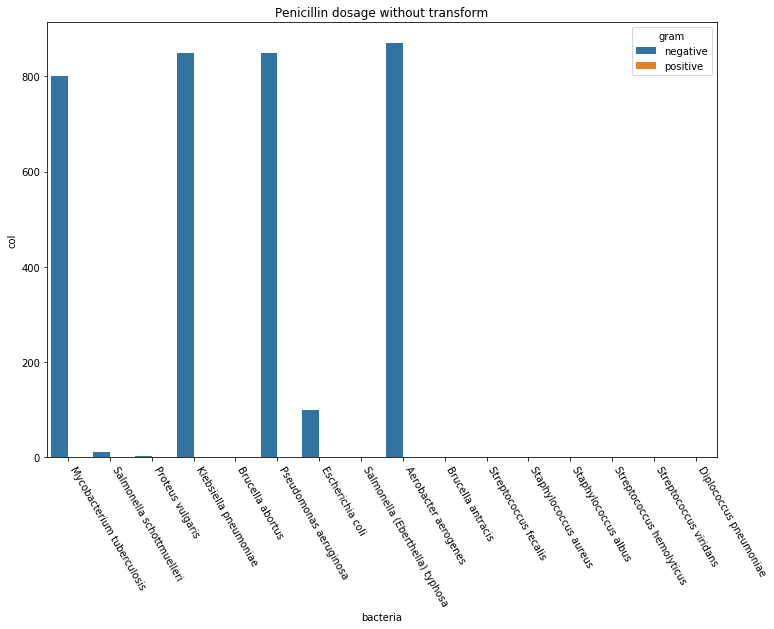

In [133]:
antibiotic_barplot('penicillin')

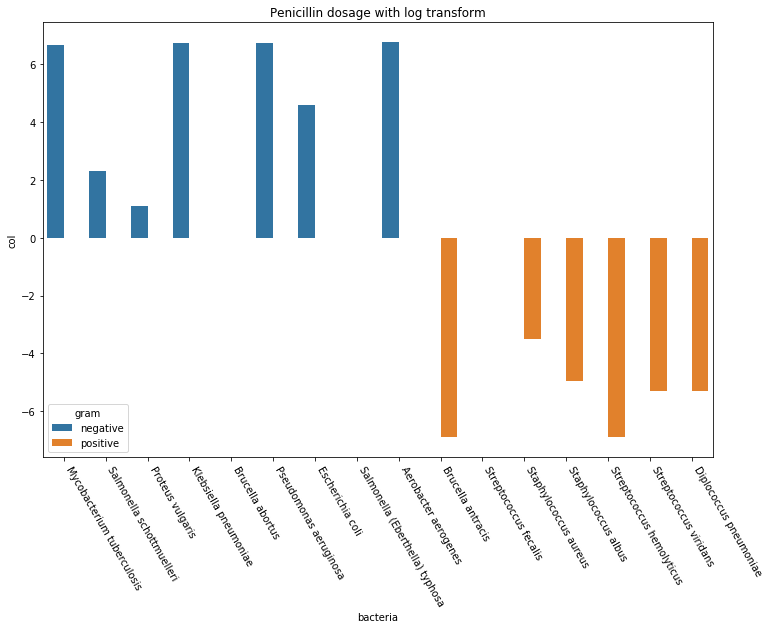

In [134]:
antibiotic_barplot('penicillin', math.log)

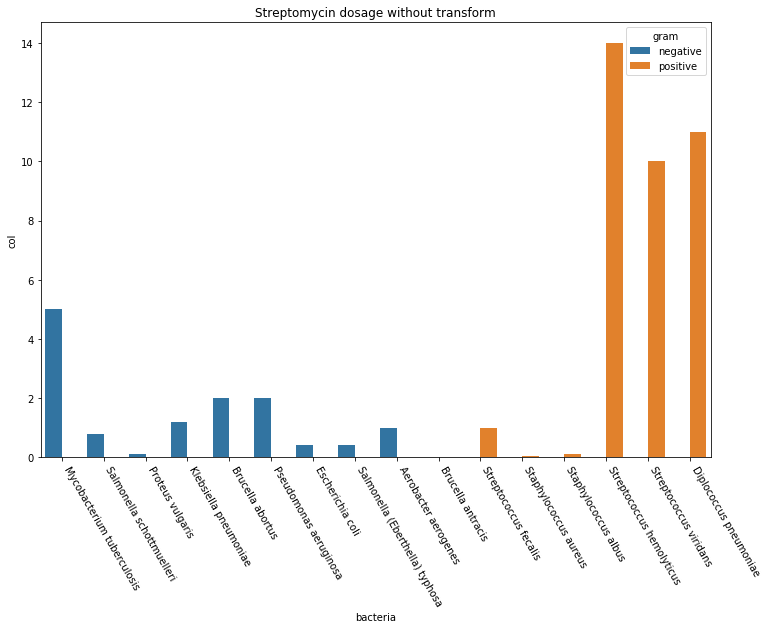

In [135]:
antibiotic_barplot("streptomycin")

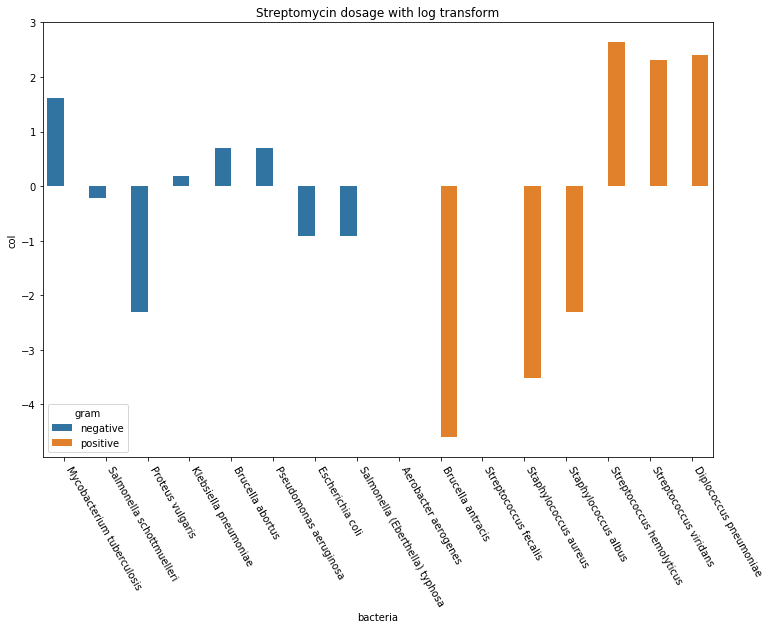

In [136]:
antibiotic_barplot("streptomycin", math.log)

---

#### Make a heatmap of the Burtin data; try variations such as a clustermap and quantizing values

In [153]:
trans = data.assign(log_neg=data['neomycin'].apply(math.log),
                    log_pen=data['penicillin'].apply(math.log),
                    log_str=data['streptomycin'].apply(math.log))

In [176]:
trans_mean = trans.groupby('bacteria').mean().loc[:, ['log_neg', 'log_pen', 'log_str']]
trans_mean = trans_mean.sort_values(['log_neg','log_pen', 'log_str'], ascending=False)

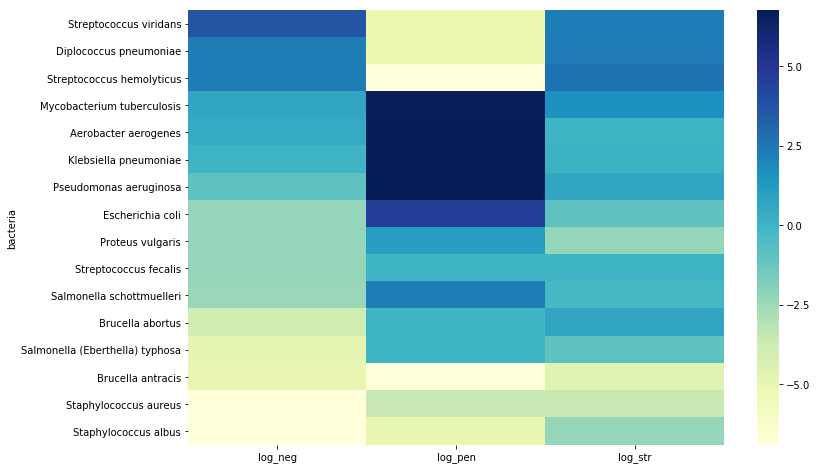

In [235]:
g = sns.heatmap(cmap='YlGnBu',
                data = trans_mean)

[Cluster Map](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

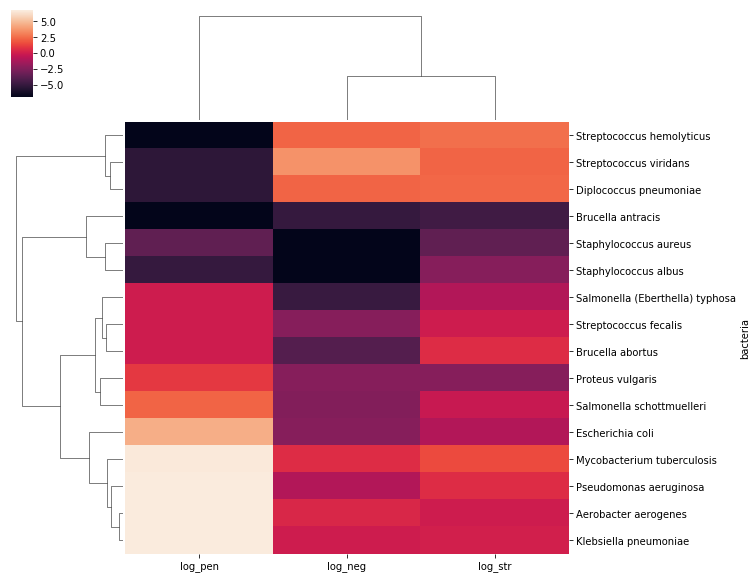

In [179]:
g = sns.clustermap(trans_mean)

Change similarity metric

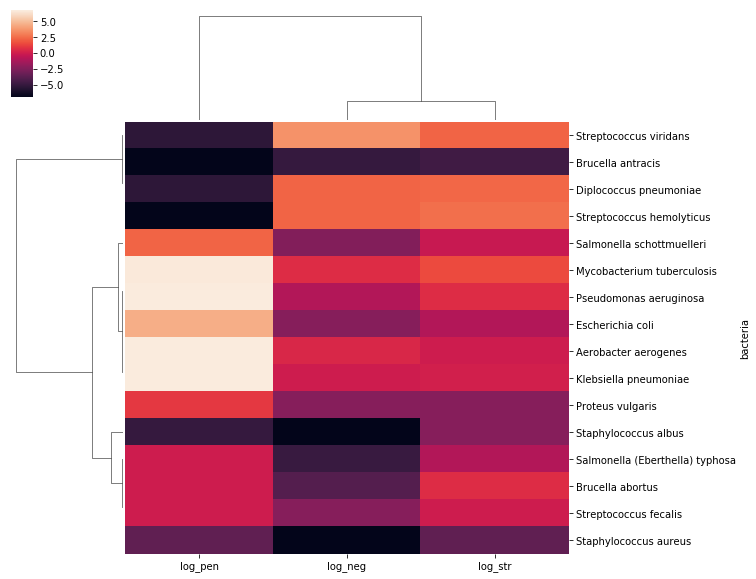

In [180]:
g = sns.clustermap(trans_mean, metric="correlation")

Label _gram_ column by color

In [231]:
pn = dict(zip(data.gram.unique(), 'rg'))

In [230]:
trans_mean_df = trans_mean.join(trans.set_index('bacteria').loc[:, 'gram'])

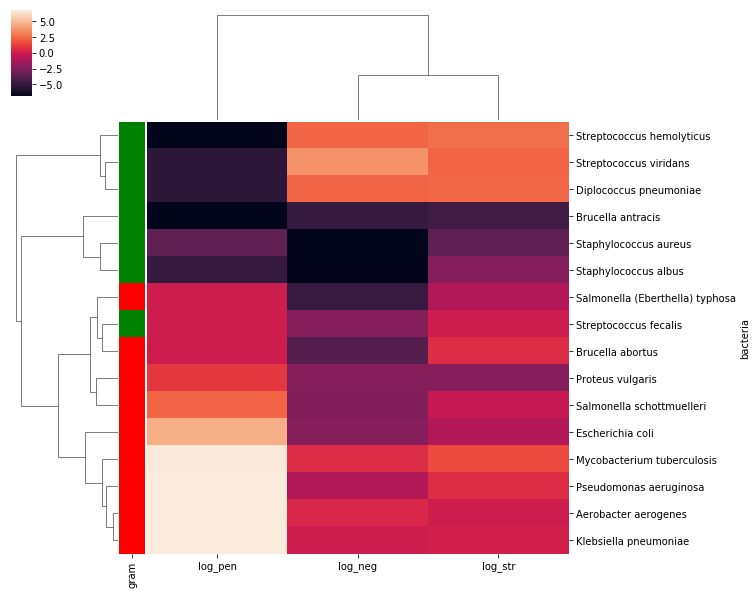

In [228]:
g = sns.clustermap(data = trans_mean_df.copy().drop("gram", axis=1), 
               row_colors = trans_mean_df.copy().pop('gram').map(pn))

Normalize the data within the rows with z-score

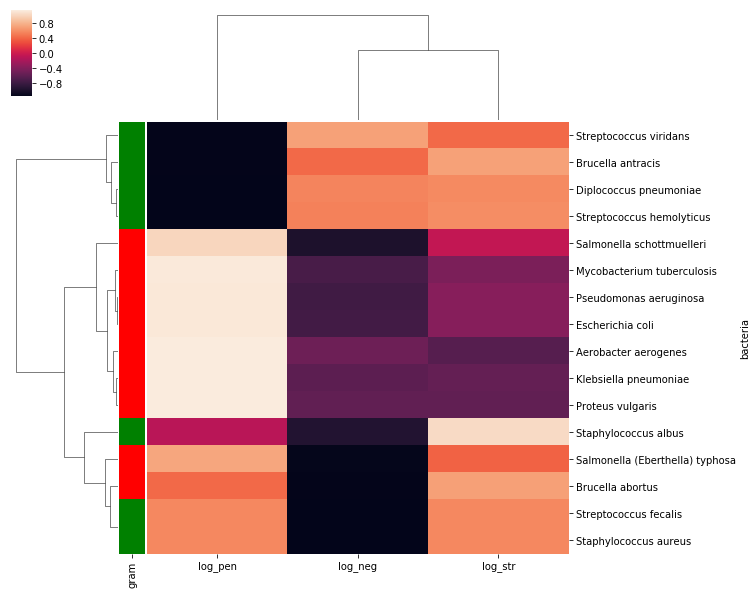

In [229]:
g = sns.clustermap(data = trans_mean_df.copy().drop("gram", axis=1), 
                   row_colors = trans_mean_df.copy().pop('gram').map(pn),
                   z_score=0)